In [1]:
%load_ext autoreload
import uproot as ut
import utils
import awkward as ak

from tqdm import tqdm

from utils.cutConfig import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)

In [3]:
variable = "jet_btag"
baseline = [{"variable":variable,"njets":8,"maxjets":8,"btagcut":None,"njetcut":6,"tag":"n>=6 & No btag"}]
baseline_info = utils.iterative_selection(branches,baseline)

--- Baseline Captured Jets ---
Event  Efficiency:     0.6
Signal Efficiency:     0.74
Signal Purity:         0.45
Event  Avg Selected:   4.91 -> 92.60%
Signal Avg Selected:   5.48 -> 91.36%
Event  Total Selected: 92.60%
Signal Total Selected: 91.36%
Event  Avg Captured:   4.92 -> 92.79%
Signal Avg Captured:   5.50 -> 91.59%


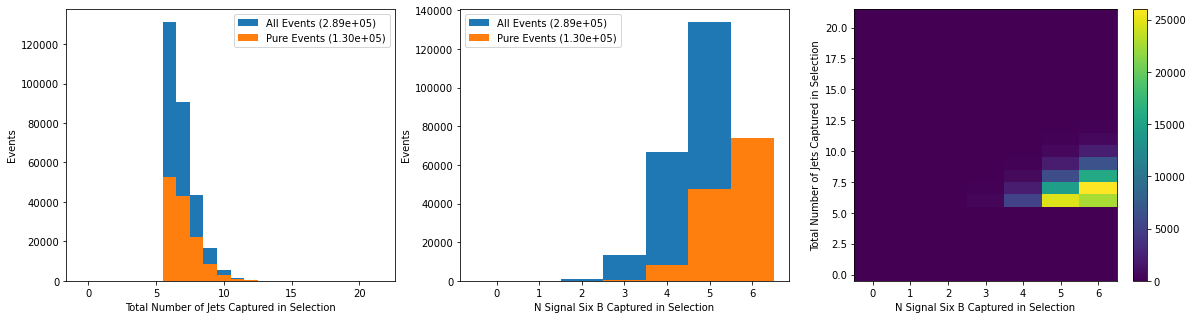

In [4]:
plot_info = {
    "branches":branches,
    "title":f"Baseline Captured Jets",
}
plot_info.update(**baseline_info[0])
utils.njet_study(**plot_info)

In [12]:
selection_list = [
    [{"variable":variable,"njets":0,"btagcut":None,"njetcut":6,"tag":"No btag"},
    {"variable":variable,"njets":6,"btagcut":jet_btagWP[tightWP],"njetcut":njet,"tag":f"n>={njet},tight btag"}]
    for njet in range(9)
]

selection_info = [ utils.iterative_selection(branches,scheme) for scheme in selection_list ]

--- Baseline & tight btag Jets ---
Event  Efficiency:     0.6
Signal Efficiency:     0.74
Signal Purity:         0.45
Event  Avg Selected:   3.17 -> 59.76%
Signal Avg Selected:   3.52 -> 58.64%
Event  Total Selected: 59.76%
Signal Total Selected: 58.64%
Event  Avg Captured:   3.17 -> 59.77%
Signal Avg Captured:   3.52 -> 58.66%


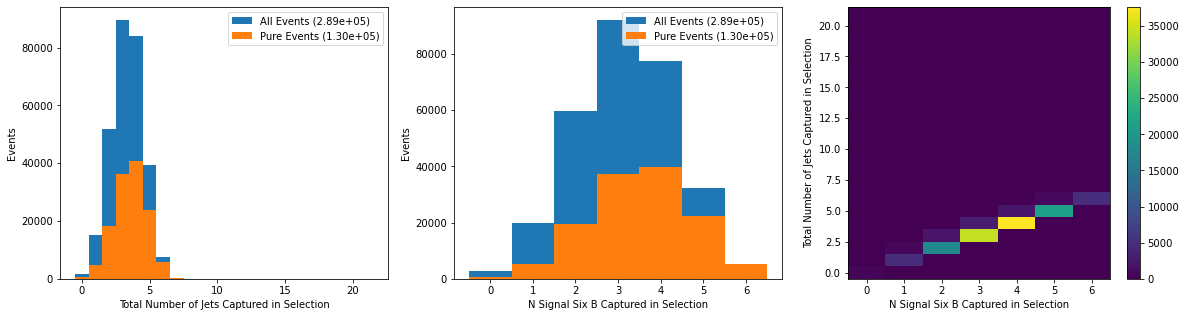

In [13]:
tight_bjet_info = selection_info[0][1]

plot_info = {
    "branches":branches,
    "title":f"Baseline & tight btag Jets",
}
plot_info.update(**tight_bjet_info)
utils.njet_study(**plot_info)

In [14]:
for i,selection in enumerate(selection_info[1:]):
    merged_tag = " & ".join( "{njets} {tag}".format(**step) for step in selection[:-1] )
    plot_info = {
        "branches":branches,
        "plot":0,
        "title":f"Selected {merged_tag} Jets",
        "missing":False
    }
    plot_info.update(**selection[-1])
    utils.presel_study(**plot_info)

--- Selected 0 No btag & 6 n>=1,tight btag Jets ---
Event  Efficiency:     0.59
Signal Efficiency:     0.74
Signal Purity:         0.45
Event  Avg Selected:   3.19 -> 60.12%
Signal Avg Selected:   3.53 -> 58.88%
Event  Total Selected: 60.12%
Signal Total Selected: 58.88%
Event  Avg Captured:   4.92 -> 92.83%
Signal Avg Captured:   5.50 -> 91.62%
--- Selected 0 No btag & 6 n>=2,tight btag Jets ---
Event  Efficiency:     0.56
Signal Efficiency:     0.71
Signal Purity:         0.46
Event  Avg Selected:   3.31 -> 62.28%
Signal Avg Selected:   3.63 -> 60.50%
Event  Total Selected: 62.28%
Signal Total Selected: 60.50%
Event  Avg Captured:   4.95 -> 93.11%
Signal Avg Captured:   5.51 -> 91.89%
--- Selected 0 No btag & 6 n>=3,tight btag Jets ---
Event  Efficiency:     0.46
Signal Efficiency:     0.61
Signal Purity:         0.48
Event  Avg Selected:   3.65 -> 67.92%
Signal Avg Selected:   3.91 -> 65.23%
Event  Total Selected: 67.92%
Signal Total Selected: 65.23%
Event  Avg Captured:   5.04 -> 9

--- Selected 0 No btag & 2 tight btag Jets ---
Event  Efficiency:     0.56
Signal Efficiency:     0.71
Signal Purity:         0.46
Event  Avg Selected:   1.91 -> 95.34%
Signal Avg Selected:   1.97 -> 98.27%
Event  Total Selected: 35.84%
Signal Total Selected: 32.76%
Event  Avg Captured:   4.95 -> 93.11%
Signal Avg Captured:   5.51 -> 91.89%


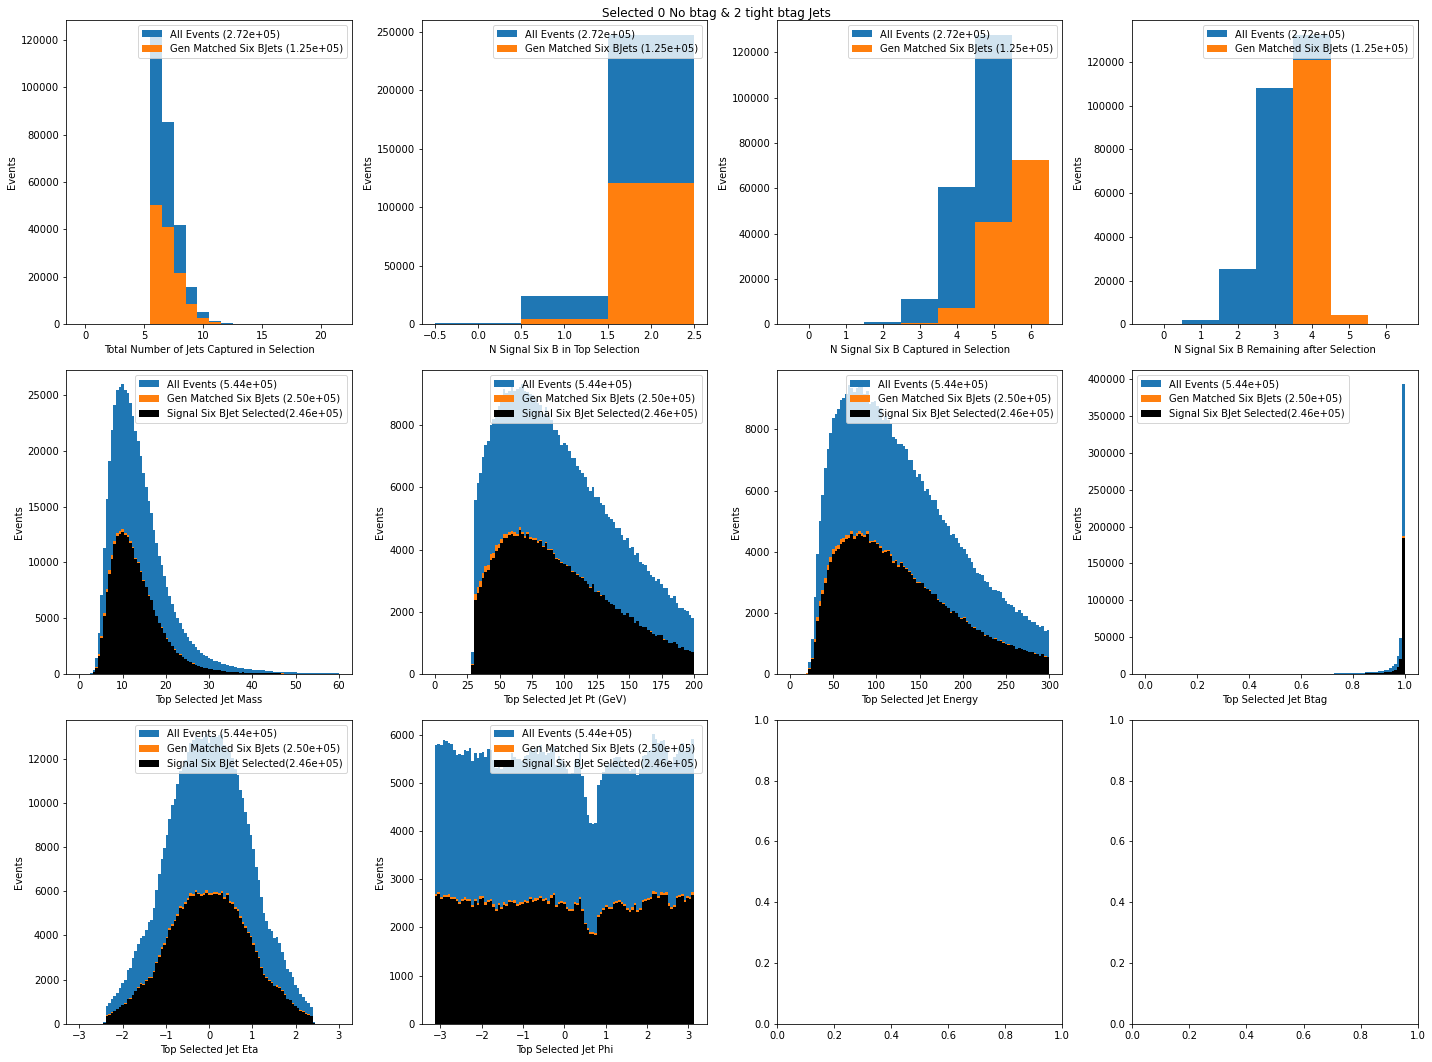

In [8]:
step_1_info = selection_info[2]
merged_tag = " & ".join( "{njets} {tag}".format(**step) for step in step_1_info[:-1] )
plot_info = {
    "branches":branches,
    "plot":1,
    "title":f"Selected {merged_tag} Jets",
    "missing":False
}
plot_info.update(**step_1_info[-1])
utils.presel_study(**plot_info)
step_1_info = step_1_info[:-1]

In [9]:
selection_step_2_list = [
    [{"variable":variable,"njets":njet,"btagcut":jet_btagWP[mediumWP],"njetcut":njet,"tag":"medium btag"}]
    for njet in range(6)
]

selection_step_2_info = [ utils.iterative_selection(branches,scheme,previous_info=step_1_info) for scheme in selection_step_2_list ]

--- Baseline & 2 tight btag & medium btag Jets ---
Event  Efficiency:     0.56
Signal Efficiency:     0.71
Signal Purity:         0.46
Event  Avg Selected:   0.00 -> nan%
Signal Avg Selected:   0.00 -> nan%
Event  Total Selected: 0.00%
Signal Total Selected: 0.00%
Event  Avg Captured:   2.16 -> 40.69%
Signal Avg Captured:   2.54 -> 42.28%


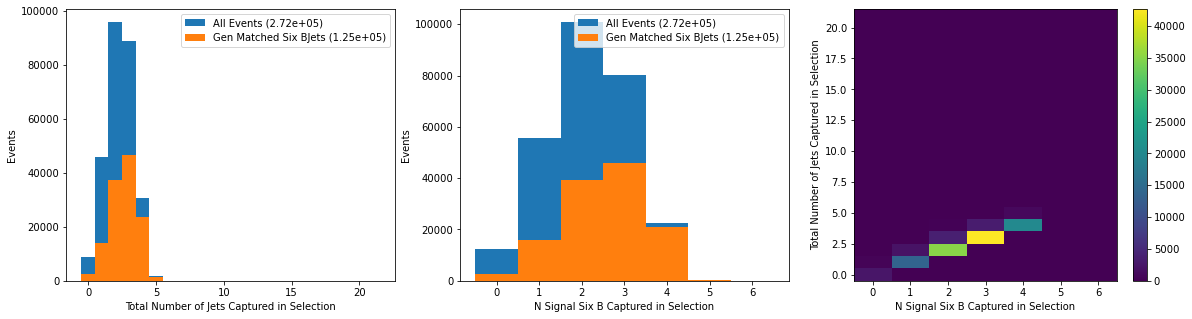

In [10]:
medium_bjet_info = selection_step_2_info[0][2]

plot_info = {
    "branches":branches,
    "title":f"Baseline & 2 tight btag & medium btag Jets",
}
plot_info.update(**medium_bjet_info)
utils.njet_study(**plot_info)

In [11]:
for i,selection in enumerate(selection_step_2_info[1:]):
    merged_tag = " & ".join( "{njets} {tag}".format(**step) for step in selection[:-1] )
    plot_info = {
        "branches":branches,
        "plot":0,
        "title":f"Selected {merged_tag} Jets",
        "missing":False
    }
    plot_info.update(**selection[-1])
    utils.presel_study(**plot_info)

--- Selected 0 No btag & 2 tight btag & 1 medium btag Jets ---
Event  Efficiency:     0.54
Signal Efficiency:     0.70
Signal Purity:         0.47
Event  Avg Selected:   2.85 -> 94.99%
Signal Avg Selected:   2.94 -> 98.06%
Event  Total Selected: 53.42%
Signal Total Selected: 49.03%
Event  Avg Captured:   4.98 -> 93.36%
Signal Avg Captured:   5.53 -> 92.10%
--- Selected 0 No btag & 2 tight btag & 2 medium btag Jets ---
Event  Efficiency:     0.45
Signal Efficiency:     0.62
Signal Purity:         0.50
Event  Avg Selected:   3.78 -> 94.73%
Signal Avg Selected:   3.91 -> 97.80%
Event  Total Selected: 70.09%
Signal Total Selected: 65.20%
Event  Avg Captured:   5.09 -> 94.33%
Signal Avg Captured:   5.58 -> 93.07%
--- Selected 0 No btag & 2 tight btag & 3 medium btag Jets ---
Event  Efficiency:     0.25
Signal Efficiency:     0.41
Signal Purity:         0.59
Event  Avg Selected:   4.70 -> 94.97%
Signal Avg Selected:   4.87 -> 97.42%
Event  Total Selected: 84.87%
Signal Total Selected: 81.18%

--- Selected 0 No btag & 2 tight btag & 2 medium btag Jets ---
Event  Efficiency:     0.45
Signal Efficiency:     0.62
Signal Purity:         0.50
Event  Avg Selected:   3.78 -> 94.73%
Signal Avg Selected:   3.91 -> 97.80%
Event  Total Selected: 70.09%
Signal Total Selected: 65.20%
Event  Avg Captured:   5.09 -> 94.33%
Signal Avg Captured:   5.58 -> 93.07%


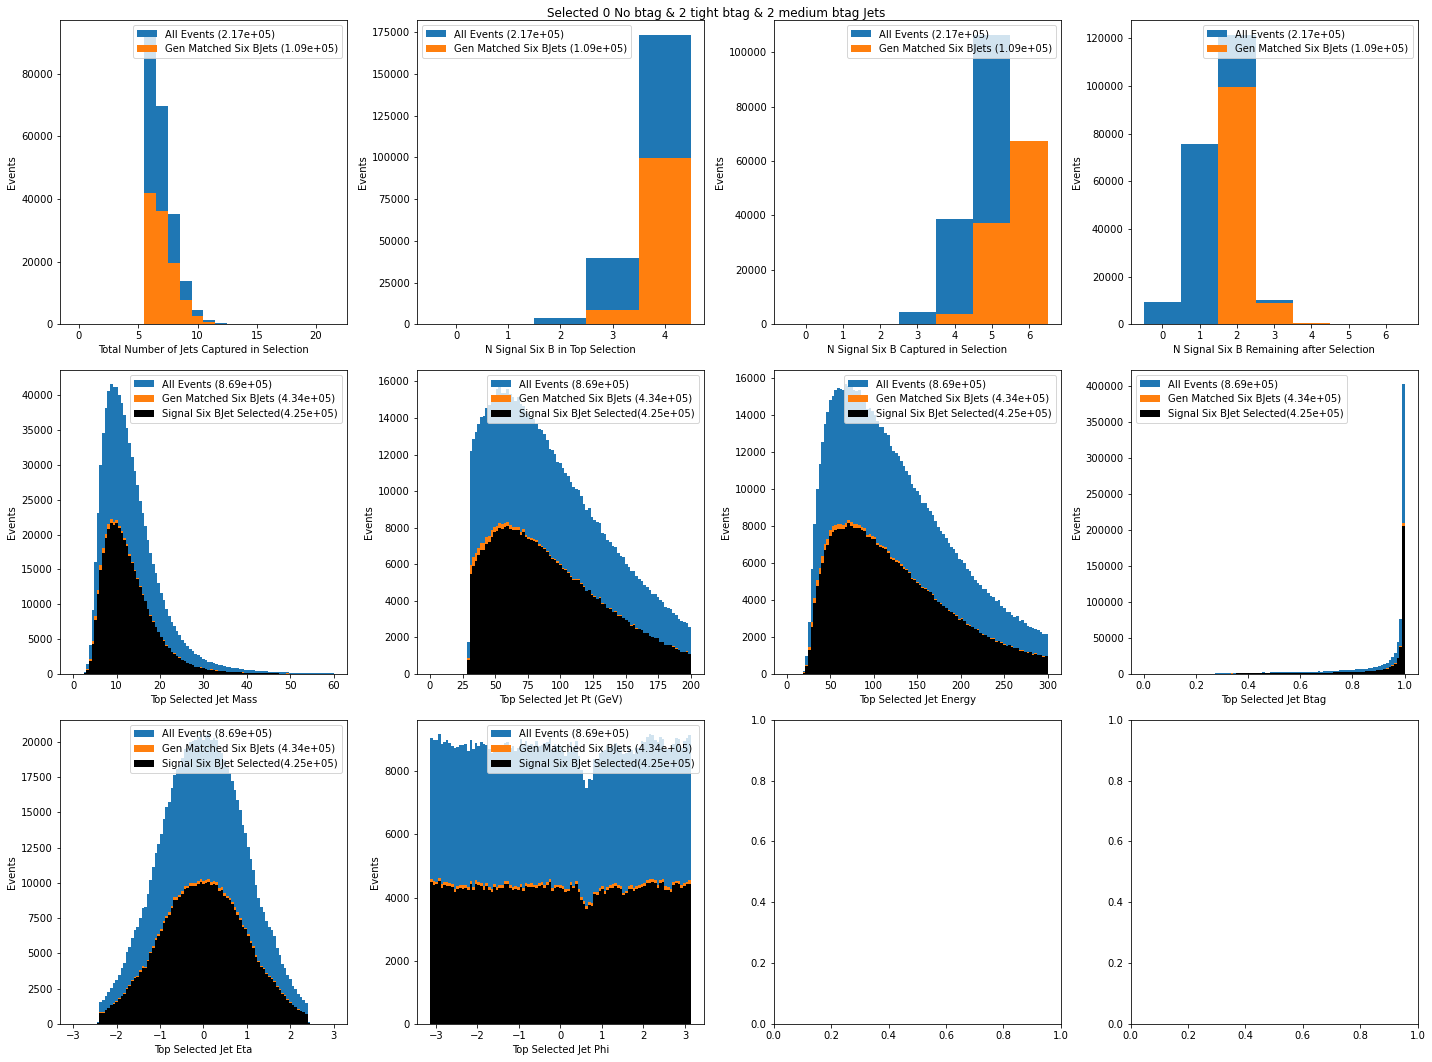

In [12]:
step_2_info = selection_step_2_info[2]
merged_tag = " & ".join( "{njets} {tag}".format(**step) for step in step_2_info[:-1] )
plot_info = {
    "branches":branches,
    "plot":1,
    "title":f"Selected {merged_tag} Jets",
    "missing":False
}
plot_info.update(**step_2_info[-1])
utils.presel_study(**plot_info)
step_2_info = step_2_info[:-1]

In [19]:
selection_step_3_list = [
    [{"variable":variable,"njets":njet,"btagcut":None,"njetcut":njet,"tag":"no btag"}]
    for njet in range(6)
]

selection_step_3_info = [ utils.iterative_selection(branches,scheme,previous_info=step_2_info) for scheme in selection_step_3_list ]

--- Baseline & 2 tight btag & 2 medium btag & no btag Jets ---
Event  Efficiency:     0.45
Signal Efficiency:     0.62
Signal Purity:         0.50
Event  Avg Selected:   0.00 -> nan%
Signal Avg Selected:   0.00 -> nan%
Event  Total Selected: 0.00%
Signal Total Selected: 0.00%
Event  Avg Captured:   1.31 -> 24.24%
Signal Avg Captured:   1.67 -> 27.87%


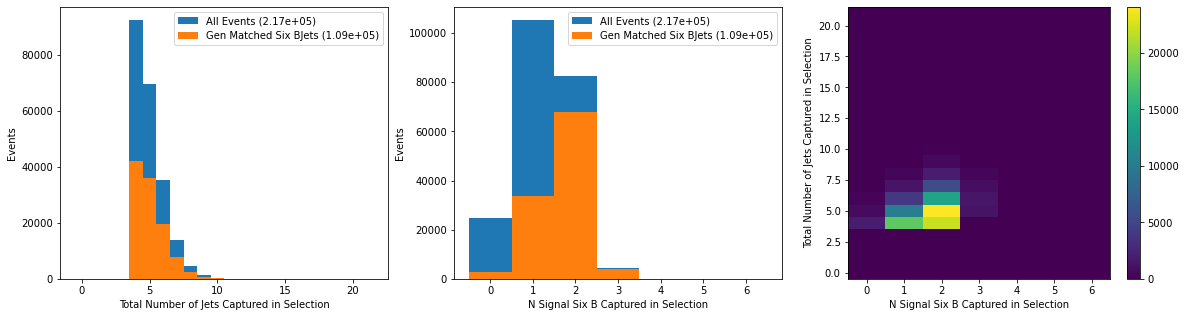

In [22]:
loose_bjet_info = selection_step_3_info[0][3]

plot_info = {
    "branches":branches,
    "title":f"Baseline & 2 tight btag & 2 medium btag & no btag Jets",
}
plot_info.update(**loose_bjet_info)
utils.njet_study(**plot_info)

In [21]:
for i,selection in enumerate(selection_step_3_info[1:]):
    merged_tag = " & ".join( "{njets} {tag}".format(**step) for step in selection[:-1] )
    plot_info = {
        "branches":branches,
        "plot":0,
        "title":f"Selected {merged_tag} Jets",
        "missing":False
    }
    plot_info.update(**selection[-1])
    utils.presel_study(**plot_info)

--- Selected 0 No btag & 2 tight btag & 2 medium btag & 1 no btag Jets ---
Event  Efficiency:     0.45
Signal Efficiency:     0.62
Signal Purity:         0.50
Event  Avg Selected:   3.78 -> 77.25%
Signal Avg Selected:   3.91 -> 78.24%
Event  Total Selected: 70.09%
Signal Total Selected: 65.20%
Event  Avg Captured:   5.09 -> 94.33%
Signal Avg Captured:   5.58 -> 93.07%
--- Selected 0 No btag & 2 tight btag & 2 medium btag & 2 no btag Jets ---
Event  Efficiency:     0.45
Signal Efficiency:     0.62
Signal Purity:         0.50
Event  Avg Selected:   3.78 -> 70.09%
Signal Avg Selected:   3.91 -> 65.20%
Event  Total Selected: 70.09%
Signal Total Selected: 65.20%
Event  Avg Captured:   5.09 -> 94.33%
Signal Avg Captured:   5.58 -> 93.07%
--- Selected 0 No btag & 2 tight btag & 2 medium btag & 3 no btag Jets ---
Event  Efficiency:     0.45
Signal Efficiency:     0.62
Signal Purity:         0.50
Event  Avg Selected:   4.55 -> 84.33%
Signal Avg Selected:   4.80 -> 80.01%
Event  Total Selected: 